<a href="https://colab.research.google.com/github/marthur648/Phys202L/blob/main/Copy_of_Field_Mapping_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2:  Electric Field Mappin'

Morgan Arthur, Ben Kropff, Patience James


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# The following lines make plots in dark mode look reasonable.  If you are not using dark
# mode you don't need them, but you can also just leave them here and it should work fine.

dark_mode = False
# plotting choices for dark-mode
if (dark_mode):
    from jupyterthemes import jtplot
    jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
    linecolor = 'w'
else:
    linecolor = 'k'

# Parallel Plates - Small Distance

Using an electric plate the electric field was measured at 2V, 4V, 6V, 8V, and 10V between two plates with a charge of 0V and 12V. The distances at each voltage above was measured.

In [3]:
# Create a Pandas DataFrame with data for part 1

# The data elements are [V, dV, x_cm, dx_cm]

data = [[2.00,0.05,2.4,0.05], [4.00,0.05,3.5,0.05],  
        [6.00,0.05,4.55,0.05], [8.00,0.05,5.6,0.05],
         [10.00,0.05,6.7,0.05]]
# create dataframe
df = pd.DataFrame(data, columns = ['V', 'dV','x_cm','dx_cm'])

print(df.to_string(index=False))

   V   dV  x_cm  dx_cm
 2.0 0.05  2.40   0.05
 4.0 0.05  3.50   0.05
 6.0 0.05  4.55   0.05
 8.0 0.05  5.60   0.05
10.0 0.05  6.70   0.05


The measured distances were converted from cm to meters to provide an X value on a linear graph. 

In [4]:
df['x'] = 0.01*df['x_cm']
df['dx'] = 0.01*df['dx_cm']

print(df.to_string(index=False))

   V   dV  x_cm  dx_cm      x     dx
 2.0 0.05  2.40   0.05 0.0240 0.0005
 4.0 0.05  3.50   0.05 0.0350 0.0005
 6.0 0.05  4.55   0.05 0.0455 0.0005
 8.0 0.05  5.60   0.05 0.0560 0.0005
10.0 0.05  6.70   0.05 0.0670 0.0005


A linear plot was created of Voltage vs Distance. The slope is then calculated to be our electric field based off of the equation $(change in voltage)=electric field * Distance$

Beta: [186.9122559   -2.50450765]
Beta Std Error: [1.0085257  0.04835918]
Beta Covariance: [[ 9.81192069 -0.44644237]
 [-0.44644237  0.02255994]]
Residual Variance: 0.10366207827083414
Inverse Condition #: 0.014680197921505586
Reason(s) for Halting:
  Sum of squares convergence

Final Result: Y = (186.912255904 +/- 1.008525701) X + (-2.504507649 +/- 0.048359175)


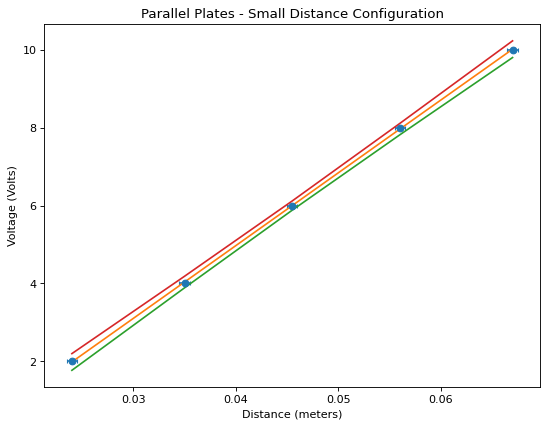

In [10]:
xi = df['x']
yi = df['V']
sigmaxi = df['dx']
sigmayi = df['dV']

##############################

from scipy.odr import *

def fitfunction(B, x):
    '''Linear function y = m*x + b'''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    #
    # Return an array in the same format as y passed to Data or RealData.
    return B[0]*x + B[1]

linear = Model(fitfunction) # create a Model object based on the fitfuncion we have defined
mydata = RealData(xi, yi, sx=sigmaxi, sy=sigmayi) # create a data object based on our data, include errors.
myodr = ODR(mydata, linear, beta0=[1., 2.]) # create a fitting object, based on the data, fit Model, and an intial set of parameters.
myoutput = myodr.run()  # run the fitting process to get optimized parameters!

myoutput.pprint() # print out the result of the fit

# Now assign the important fit results to some more convenient variables.

popt = myoutput.beta # the vector of optimized parameters
pcov = myoutput.cov_beta # the covariance matrix
perr = myoutput.sd_beta # the vector of ERRORS in the optimized parameters

# The following lines generate upper and lower 99% "Confidence Bands" on the fit, for visualization
# purposes.

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(pi,xi) for pi in ps])

lower = np.percentile(ysample,0.5,axis=0)
upper = np.percentile(ysample,99.5,axis=0)
middle = (lower+upper)/2.0

print()
print ("Final Result: Y = (%0.9f +/- %0.9f) X + (%0.9f +/- %0.9f)" % (popt[0],perr[0],popt[1],perr[1]))

plt.figure(figsize=(8, 6), dpi=80)

plt.errorbar(xi, yi, xerr=sigmaxi, yerr=sigmayi, fmt='o', capsize=2, capthick=1)

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)

#########################

plt.xlabel('Distance (meters)')
plt.ylabel('Voltage (Volts)')
plt.title('Parallel Plates - Small Distance Configuration')
plt.show()

In [12]:
# Expected Electric Field calculation

d_plates = 9.8*0.01
dd_plates = 0.05*0.01

V_plates = 12.0
dV_plates = 0.1

E_expected = V_plates/d_plates
dE_expected = E_expected*(dV_plates/V_plates+dd_plates/d_plates)

print("Expected Electric Field = %0.1f +/- %0.1f" % (E_expected,dE_expected))

Expected Electric Field = 122.4 +/- 1.6


Based off of the data collected we found the electric field by the slope of the linear graph to be (186.912255904 +/- 1.008525701) and the expected electric field calculation was thought to be (122.4 +/- 1.6). Therefore, there is a drastic difference in the calculation of the measured electric field as they do not agree in terms of uncertainities. The place where 0V was measured may be incorrect causing the distances between the measured voltages to be inaccurate. We found that if 0V was measured between the inner edge of the plates giving 6.8cm instead of 9.8cm, the expected electric field was 176.5 +/- 2.8. Although this calculation still does not agree with the calculated slope, it does indicate that the distance where 0V is measured does affect the final calculation of the slope. While an electric field is 3D, this lab only measured the electric field in 2D which could also cause inaccurate data. Trying to measure the location of the lower voltages (2V and 4V) was more difficult and could require a higher uncertainity.

## Analysis of Voltage vs. Position Result

First of all, we see that this is a pretty good linear fit!

Second, we see that the result for the y-intercept (b) is $(0.494 \pm 0.082)$ Volts.  This is close to zero, but still inconsistent with our expectations.

Third, we see that the average electric field (the slope) that we were trying to determine is
$(169.9 \pm 2.3)$ Volts per meter.  Based on the calculation of the expected value (in the next cell), we are not in agreement with that result.  Why?

# Parallel Plates - Large Distance

Complete the analysis for the large distance configuration, based on the analysis above.